In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning/KNN/Social_Net_class.csv')

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [156]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [157]:
data['Gender'] = data['Gender'].replace(['Male','Female'],[0,1])

<ipython-input-157-ed879dd0507a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace(['Male','Female'],[0,1])


In [158]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [159]:
X = data.iloc[1:,:-1].values

In [160]:
y = data.iloc[1:,-1].values

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)*100

80.56426332288402

In [164]:
knn.score(X_test,y_test)

0.7625

Without feature scaling

In [165]:
y_pred=knn.predict(X_test)

In [166]:
display(y_test,y_pred)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [167]:
print('Accuracy is:',knn.score(X_test,y_pred))

Accuracy is: 1.0


In [168]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))

[[48  5]
 [14 13]]


Text(50.58159722222221, 0.5, 'Actual')

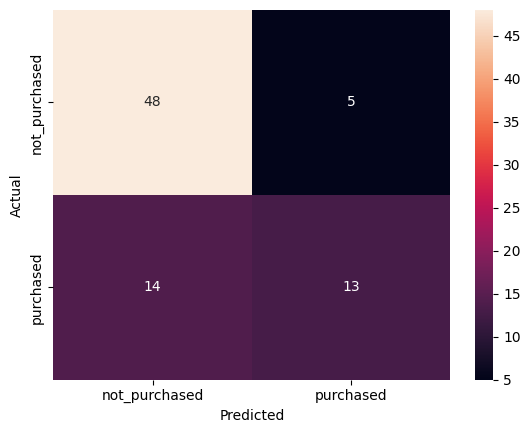

In [169]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,
            xticklabels = ['not_purchased','purchased'], yticklabels = ['not_purchased','purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [170]:
sum(y_test == 0)

53

In [171]:
sum(y_test == 1)

27

In [172]:
sum(y_pred == 0)

62

In [173]:
sum(y_pred == 1)

18

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        53
           1       0.72      0.48      0.58        27

    accuracy                           0.76        80
   macro avg       0.75      0.69      0.71        80
weighted avg       0.76      0.76      0.75        80



In [175]:
from sklearn.metrics import precision_score , recall_score, f1_score,r2_score

In [176]:
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('for k value:',i,'precision is:', precision_score(y_test,y_pred,average='weighted'))

for k value: 1 precision is: 0.6794270833333333
for k value: 2 precision is: 0.791796875
for k value: 3 precision is: 0.7832589285714285
for k value: 4 precision is: 0.791796875
for k value: 5 precision is: 0.7566532258064516
for k value: 6 precision is: 0.7603515625
for k value: 7 precision is: 0.74137187230371
for k value: 8 precision is: 0.7272177419354839
for k value: 9 precision is: 0.74137187230371
for k value: 10 precision is: 0.6974609375


In [185]:
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
f1_list = []
k_list = []
for k in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    f= f1_score(y_test,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

In [178]:
k_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [186]:
f1_list

[0.6375230743413325,
 0.7296760087457761,
 0.7553516819571866,
 0.7296760087457761,
 0.7062801932367149,
 0.6978731862452793,
 0.6948893974065599,
 0.6753623188405797,
 0.6948893974065599,
 0.6342675412442854]

In [180]:
max(f1_list)

0.7553516819571866

In [181]:
best_f1_score=max(f1_list)
best_k = k_list[f1_list.index(best_f1_score)]
print('Optimum K value =',best_k,"with F1-Score=",best_f1_score)

Optimum K value = 3 with F1-Score= 0.7553516819571866


Text(0.5, 1.0, 'K neighbours vs f1_score')

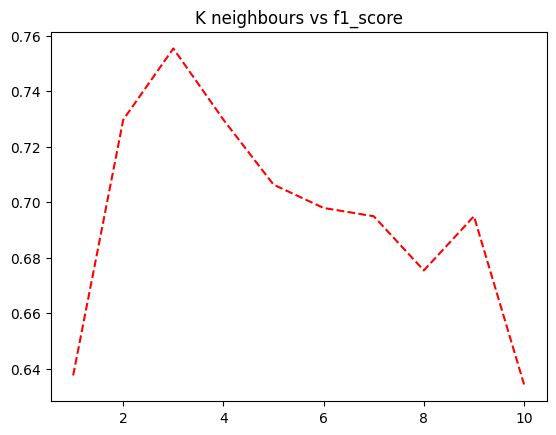

In [182]:
plt.plot(k_list,f1_list,'r--')
plt.title('K neighbours vs f1_score')

With feature Scaling

In [141]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [142]:
scaler.transform(X_train)

array([[ 0.70135293, -1.04161765, -0.78877536, -0.76084053],
       [ 0.88702183,  0.96004518,  0.16831608, -0.27849791],
       [-0.40204675,  0.96004518,  0.83828009,  0.8369196 ],
       ...,
       [ 0.73772253,  0.96004518,  0.16831608,  0.32443062],
       [ 0.90725861,  0.96004518, -0.40593879, -0.24835106],
       [-0.56578067,  0.96004518, -1.0759028 , -1.54464718]])

In [143]:
# when we are scaling the training input , we mst have to scale testing input as well
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
#Converted X_train
X_train[:3]

array([[ 0.70135293, -1.04161765, -0.78877536, -0.76084053],
       [ 0.88702183,  0.96004518,  0.16831608, -0.27849791],
       [-0.40204675,  0.96004518,  0.83828009,  0.8369196 ]])

In [145]:
#from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [146]:
model.score(X_train,y_train)*100

93.10344827586206

In [147]:
model.score(X_test,y_test)*100

86.25

In [148]:
y_pred=knn.predict(X_test)